# DS Methodology Guideline

https://www.youtube.com/watch?v=3U-P1zib0sM##### Author information
- Name: Eunji Hwang
- email address: hej6251422@gmail.com
- GitHub: wldms77
- Youtube URL: https://www.youtube.com/watch?v=3U-P1zib0sM 

## Part 1. Brief background of methodology

### **1.1 Brief Introduction on the background of LightGBM** ####

LightGBM belongs to the GBM family as a variant model. The GBM model is a model that belongs to the boosting series among ensemble techniques. Therefore, the boosting, GBM, and XGBoost models, which are the situations before LightGBM was introduced, will be described.

#### **1) Ensemble Techniques – Boosting** #####

- An ensemble is a concept that creates a new model by using several basic models. A model with good overfitting is basically used to collect various opinions (predicted values) on test data, and a tree-based model is often used. That is, a decision tree is commonly used as the basic algorithm for an ensemble  <br><br>
- Boosting is a method of making a weak classifier into a strong classifier by using weights in a way that focuses on misclassified data and gives more weights. Initially, the data all have the same weight, but after each round is over, the weight and importance are calculated. Weight distribution is considered during restoration extraction, and more is considered in the next round as misclassified data gain more weight. Therefore, it is the direction to steadily improve the generated model.

#### **2) Gradient Boosting Model** #####

- GBM (Gradient Boosting Machine) is a type of boosting algorithm that learns from the discrepancies (residuals) between the predictions made by weak learners and the actual label data. To minimize the loss function, it employs the Gradient Descent algorithm and is primarily applied to decision tree models.
Gradient Descent is a method for finding the optimal parameters that minimize the loss function. Therefore, Gradient Boosting can be understood as a process where the search occurs not over parameters but over model functions. The gradient reveals the weaknesses of the currently trained model, allowing other models to focus on addressing these weaknesses and thereby enhance overall performance.


##### **2) -1. GBDT(Gradient Boosting Decision Tree)** <br>
- One of the representative models that utilize Gradient Boosting is GBDT. This technique initially learns a very simple tree and then proceeds by complementing the tree's mistakes by the next tree, which means that it continues to add new trees in the direction of reducing the error (residues) of the previous model.

##### **2)-2. XGBoost(Extreme Gradient Boost)**<br>
- XGBoost is an algorithm developed to address the drawbacks of the traditional GBM algorithm, specifically its slow speed and susceptibility to overfitting. While it is based on Gradient Boosting and incorporates a weighting perspective, it offers faster performance and includes several regularization terms to help prevent overfitting. These regularization terms penalize the loss value as model complexity increases.  
XGBoost provides features such as pruning and early stopping. Pruning involves removing splits that do not yield positive gains, thereby reducing the number of splits. Early stopping allows the algorithm to internally perform cross-validation during each iteration and halt the process if the evaluation metrics on the validation data become optimal.

### **1.2 Why the Methodology Emerged and Its Applications** #### 

**1) Limitations of Gradient Boosting Models<br>**
- While XGBoost is an improved variant of GBM, it has been criticized for still having slow training speeds. The tree splitting method used by XGBoost follows a level-wise tree growth approach, which minimizes tree depth while creating balanced trees. This means that to maintain balanced tree growth, the depth of all leaf nodes is increased equally with each split. Consequently, this balancing act can lead to a reduction in tree depth, which may increase computational costs when dealing with large datasets.  
Additionally, categorical variables must be pre-processed through one-hot encoding or integer encoding before being handled by the model.
Given these limitations, LightGBM was introduced with the objectives of improving the handling of large-scale and high-dimensional data, enhancing training speed, and increasing memory efficiency.


**2) Methodology application** 
- LightGBM has strength in handling large datasets. It also works efficiently in high-dimensional data. It can perform well even when there are many features, such as text data or image data.
It is also useful in environments with limited cloud-based services or resources due to low memory usage. Therefore, this methodology is actively used in environments like this.


---

## Part 2. Key concept of methodology

### **2.1 Key Concepts of LightGBM with mathematical equations** ####

#### **1) Gradient Boosting Algorithm**

**step 1**. Initial Model Setting $ F_0(x)$ <br><br>
$$
\begin{equation}
   F_0(x) = \arg \min_\rho \sum_{i=1}^{N} L(y_i, \rho)
\end{equation}
$$
<br><br>
- Here, $ F_0(x)$ s a constant model that minimizes the loss function $L(y_i, \rho)$ for the given data $(x_i, y_i)$.

**step 2**. Residual Calculation $ g_m(x_i): $ <br><br>
$$
\begin{equation}
g_m(x_i) = \left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x)=F_{m-1}(x)}, \quad 1 \leq i \leq N
\end{equation}
$$
<br><br>
- The residual represents the gradient of the loss function, indicating the rate of change of the loss function at $F_{m-1}(x)$.

**step 3**. Training a New Weak Learner $a_m$:<br><br>
$$
\begin{equation}
   a_m = \arg \min_{a, \beta} \sum_{i=1}^{N} \left[ -g_m(x_i) - \beta h(x_i; a) \right]^2
\end{equation}
$$ <br> <br>
- The new learner $h(x_i;a)$ is trained to best explain the residuals.

**step 4**. Learning Rate Optimization $\rho_m $:
<br><br>
$$
\begin{equation}
   \rho_m = \arg \min_\rho \sum_{i=1}^{N} L(y_i, F_{m-1}(x_i) + \rho h(x_i; a_m))
\end{equation}
$$
<br><br>
- The learning rate $\rho_m $ adjusts the contribution of the newly added learner.

**step 5**. Model Update: <br><br>
$$
\begin{equation}
   F_m(x) = F_{m-1}(x) + \rho_m h(x; a_m)
\end{equation}
$$
<br>
- Finally, the model $F_m(x)$ is updated by adding the newly trained learner to the previous model.
<br>


<br>

#### **2) New Techniques for Complementing the Limits of GBMs:   GOSS, EFS**

##### **2) -1. Gradient-based One-Side Sampling (GOSS)**

a technique used in LightGBM to improve data sampling by focusing on important data points (those with large gradients) while randomly sampling less important data points (those with small gradients) to reduce computational overhead. The goal of GOSS is to maximize computational efficiency while maintaining model performance.

- Sampling <br> <br>
    - GOSS prioritizes keeping instances with large gradients while randomly sampling and discarding instances with small gradients.  
    - Data with large gradients provides more information for the model, so it should be retained. On the other hand, instances with small gradients are less critical for model learning and can be sampled selectively.
    - After discarding instances with small gradients, GOSS compensates for the information loss by multiplying the remaining small gradient instances by a constant. This adjustment constant is defined as: <br>
$$
\begin{equation}
    (1-a) / b
\end{equation}
$$


        - a: the proportion of instances with large gradients
        - b: the proportion of small gradient instances sampled from the remaining data

- Mathemetical concept : <br><br>
  The loss function $L(G)$ is expressed as follows:
    
$$
\begin{equation}
L(G)=∑_{i∈A}g_i^2+k∑_{i∈B}g_i^2
\end{equation}
$$

- $A$: the set of data points with large gradients 
- $B$: the set of randomly selected data points with small gradients
- $k$: the adjustment factor for small gradients

<br>

**2) -2. Exclusive Feature Bundling (EFB)**

EFB is a technique for processing high-dimensional data by bundling mutually exclusive (or nearly exclusive) features into a single feature. 

**step 1**. Definition of Feature Bundling <br>
- Given features $(X_1, X_2, \dots, X_n )$ we bundle mutually exclusive features with low correlation into a new feature $ X_{bundle} $. Each feature is activated only within a specific range, allowing them to be summed without conflicts.
<br><br>
$$
\begin{equation}
X_{bundle} = X_1 + X_2 + \dots + X_k
\end{equation}
$$
<br><br>
    - Here, $(X_1, X_2, \dots, X_n )$ are mutually exclusive features, each having different value ranges, thus avoiding conflicts within the same  $ X_{bundle} $

**step 2**. Transformation to Graph Coloring Problem <br><br>
- Each feature is represented as a vertex in a graph $ G = (V, E) $. Here, $ V $ is the set of features.
- If two features $ X_i $ and $ X_j $ are not mutually exclusive, we add an edge $ e_{ij} $ between them. There are no edges between mutually exclusive features.
<br><br>
$$
\begin{equation}
G = (V, E), \quad E = {(X_i, X_j) \mid X_i \text{ and } X_j \text{ are not mutually exclusive}}
\end{equation}
$$

**step 3**. Bundling through Greedy Algorithm
<br>
- The graph coloring problem minimizes conflicts between features while bundling them with one color. Using a **Greedy algorithm**, non-mutually exclusive features are assigned different colors.
- To reduce the conflict ratio, slight conflicts may be allowed; the fewer conflicts, the better the bundling.
<br><br>
$$
\begin{equation}
X_{bundle} = \sum_{i \in C_k} X_i \quad \text{where } C_k \text{ is the set of features assigned to color } k
\end{equation}
$$

**step 4**. Histogram-Based Approach
<br>
- A histogram-based algorithm partitions each feature into bins, assigning mutually exclusive features to the same bin. Since features in each bin are activated in different ranges, there are no conflicts. 

    - For example, if feature $ X_1 $ is active in the range $[0, a] $ and feature $ X_2 $ is active in the range $ [b, c] $, then:
<br><br>
$$
\begin{equation}
X_{bundle} = X_1 \text{ if } X_1 \in [0, a], \quad X_2 \text{ if } X_2 \in [b, c]
\end{equation}
$$

**2) -3. Tree splitting methods** 

- **Level-wise**: The existing GBM-based tree division method is a level-wise method. This can be divided while maintaining a tree that is as balanced as possible to prevent overfitting, and the depth of the tree can be minimized. However, it takes a long time to balance.

- **`Leaf-wise`**: LightGBM generates a deeper tree for better learning by growing the leaf node with the largest loss in the way it chooses. Unlike level-wise, it is possible to lower the computational cost by focusing on loss reduction without balancing the overall tree. The rule tree generated by continuously dividing the leaf node having the final loss value may minimize the prediction error loss than the balanced tree division method as the training is repeated.


### **2.2 Strength of LightGBM**
- **High Efficiency and Speed** : <u>LightGBM uses a leaf-wise tree growth strategy</u>, unlike the level-wise growth used in other gradient boosting models (like XGBoost). This method grows trees by choosing the leaf with the highest loss, which leads to deeper trees and better accuracy with fewer iterations.
- **Faster training**: due to leaf-wise growth and optimized training, LightGBM can handle very large datasets and train faster compared to traditional gradient boosting methods.
- **Low memory usage**: LightGBM is optimized to reduce memory usage during training, which can efficiently handle large-scale data. This is done through techniques such as GOSS and EFB. GOSS focuses on the most important data, and EFB bundles features that take almost no active value at the same time, reducing dimensions.
- **Better performance with large datasets**: LightGBM is designed to handle large-scale data effectively; it scales well with increasing data size and provides high accuracy even with large amounts of data.

---

## Part 3. Example

- #### Overview  
    - In this analysis, I will build a predictive model using the Retail Transaction Dataset to estimate the total transaction amount (TotalAmount). The dataset consists of 100,000 entries and 10 columns, with no missing values.   
    - The model will be developed using **LightGBM**, which is well-suited for large datasets and high-dimensional data.

- The Process will include: 
    - Data Loading
    - Pre-processing 
        - Feature Engineering
        - Encoding Categorical Variables
    - Model Training
    - Model Evaluation
    - Model Improvement

#### (1) Data Loading 

In [250]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import lightgbm as lgb

In [252]:
# Loading the dataset
df = pd.read_csv('Retail_Transaction_Dataset.csv')
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [254]:
# Check the inofrmation of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


#### (2) Pre-processing 

In [256]:
# Converting the 'TransactionDate' column to datetime format for easier manipulation
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extracting the day of the week as 0=Monday, 6=Sunday and adding it as a new column
df['day_of_week'] = df['TransactionDate'].dt.dayofweek

# Extracting month for feature engineering 
df['month'] = df['TransactionDate'].dt.month

# Extracting hour for feature engineering 
df['hour'] = df['TransactionDate'].dt.hour

In [258]:
# Dropping the 'TransactionDate' column 
df.drop(columns=['TransactionDate'], inplace=True)

# Creating a new column to calculates the total amount by multiplying quantity, price, and applying discount
df['TotalAmount'] = df['Quantity'] * df['Price'] * (1 - df['DiscountApplied(%)'] / 100)


In [260]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical variables to convert them into numerical form
le = LabelEncoder()

# Applying label encoding to each categorical column
df['ProductID'] = le.fit_transform(df['ProductID'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['StoreLocation'] = le.fit_transform(df['StoreLocation'])
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])

In [262]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TotalAmount']) # X contains the features except 'TotalAmount'
y = df['TotalAmount']  # y contains the target variable (TotalAmount)

# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Preparing the dataset for LightGBM training
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)


#### (3) Model Training

In [264]:
# Defining the parameters for the LightGBM model
params = {
    'objective': 'regression',  # Set objective for regression task
    'metric': 'rmse',           # Use RMSE as the evaluation metric
    'learning_rate': 0.01,      # Set learning rate
    'num_leaves': 31,           # Set number of leaf nodes
    'feature_fraction': 0.9,    # Use 90% of features for each iteration
    'n_estimators': 1000,       # Number of boosting iterations 
}

# Training the LightGBM model
lgb_model = lgb.train(
    params,            # Model parameters
    train_data,        # Training dataset
    num_boost_round=1000,     # Number of boosting iterations
    valid_sets=[valid_data],  # Validation dataset for monitoring performance
    callbacks=[lgb.early_stopping(stopping_rounds=10)] 
    # Early stopping to prevent overfitting if validation error doesn't improve after 10 rounds
)

/Users/hwang-eunji/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 11
[LightGBM] [Info] Start training from score 248.597653
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.59576


- **LightGBM model Result Explanation** :  
    - A total of 80,000 data points and 11 characteristics were used.
    - The initial score is 248.597653, and finally the root mean squared error (RMSE) of the verification set at the 1000th iteration is 1.59576.
    - The model did not meet the early stopping conditions, indicating that it performed 10 iterations without any improvement in performance. This suggests that while the model continued to train, it did not find a better solution during those iterations.


<br>

#### (4) Model Evaluation

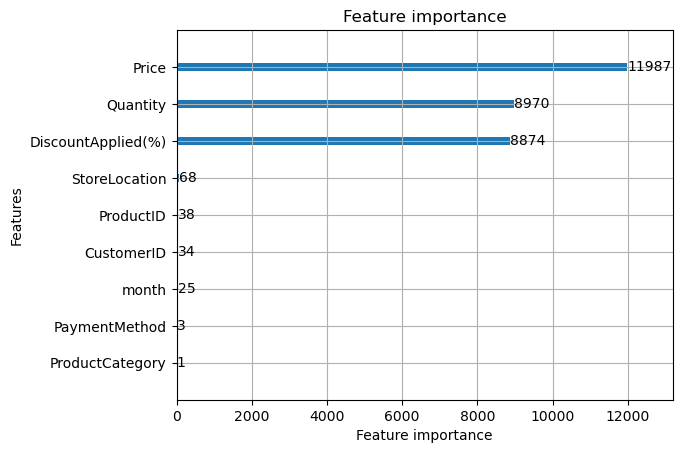

In [266]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot feature importance for the LightGBM model
lgb.plot_importance(lgb_model, max_num_features=10)
plt.show() # Show the plot

- **Plot Explanation - Feature importance** : 
    - The function <u>`lgb.plot_importance`</u>is a built-in function  that visualizes the importance of features
    - `max_num_features=10` specifies that we want to display the top 10 most important features
    - As shown in the graph, 'Price', 'Quantity', and 'DiscountApplied(%)' were the most important attributes, especially 'Price'.
This means that these characteristics have the greatest impact on the prediction results.


<br>

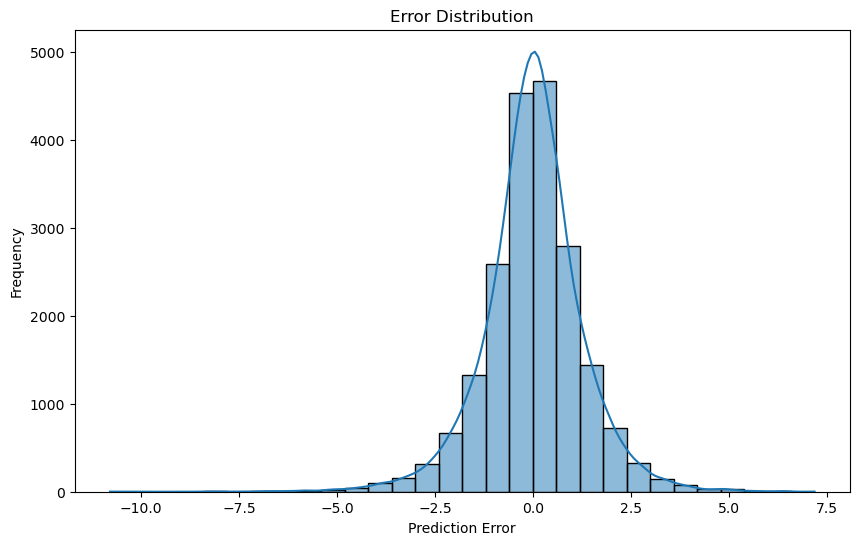

In [268]:
# Calculate prediction errors
errors = y_pred - y_valid

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


- **Plot Explanation - Error Distribution** : 
    - The error distribution graph shows the distribution of the prediction error. You can see that the error tends to follow a normal distribution and is concentrated around the mean.
    - This indicates that the model is working well overall, suggesting that the difference between predicted and real values does not deviate significantly.


<br>

#### (5) Model Improvements

In [111]:
# Set X removing less important features(based on the previous feature importance result) 
X = df.drop(columns=['TotalAmount', 'PaymentMethod', 'ProductCategory'])
y = df['TotalAmount'] # Set the y(target) variable

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Set LightGBM parameters (hyperparameter tuning)
params = {
    'objective': 'regression',   
    'metric': 'rmse',            
    'learning_rate': 0.05,       # Adjust learning rate 0.01 -> 0.05
    'num_leaves': 50,            # Increase the number of leaf nodes 31 -> 50 
    'max_depth': 10,             # Set maximum depth of the tree
    'feature_fraction': 0.9,
}

# Train the model
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,    # Set the number of boosting iterations
    valid_sets=[valid_data], # Specify validation set for evaluation
    callbacks=[lgb.early_stopping(stopping_rounds=10)] # Stop early if no improvement
)

# Predict on the validation set
y_pred = lgb_model.predict(X_valid)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f'RMSE after hyperparameter tuning: {rmse}')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] Start training from score 248.597653
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.26342
RMSE after hyperparameter tuning: 1.263420446689905


- **Explanation - Model Improvements**<br>

    (1) `Select Properties`
    - Removed properties: '<u>PaymentMethod</u>', '<u>ProductCategory</u>' were removed. By removing less important properties, we can reduce the complexity of the model and prevent overfitting.<br><br>
    

    (2) `Adjusting Hyperparameters`
   - Learning_rate: set to <u>0.05</u> to allow the model to learn more slowly. This usually provides more stable performance.
   - num_leaves: It was increased to <u>50</u> so that more complex patterns could be learned.
   - max_depth: Set to <u>10</u> to limit the maximum depth of the tree, which helps to avoid overfitting.
   - feature_fraction: You set it to <u>0.9</u> to adjust the proportion of properties to be used in each iteration.

- **Model Performance Changes**
    - RMSE change: After model improvement, the RMSE decreased to <u>`1.26342`</u>. The performance was improved compared to the previous model's RMSE of 1.59576. This indicates that the model is performing the prediction more accurately.

<br>

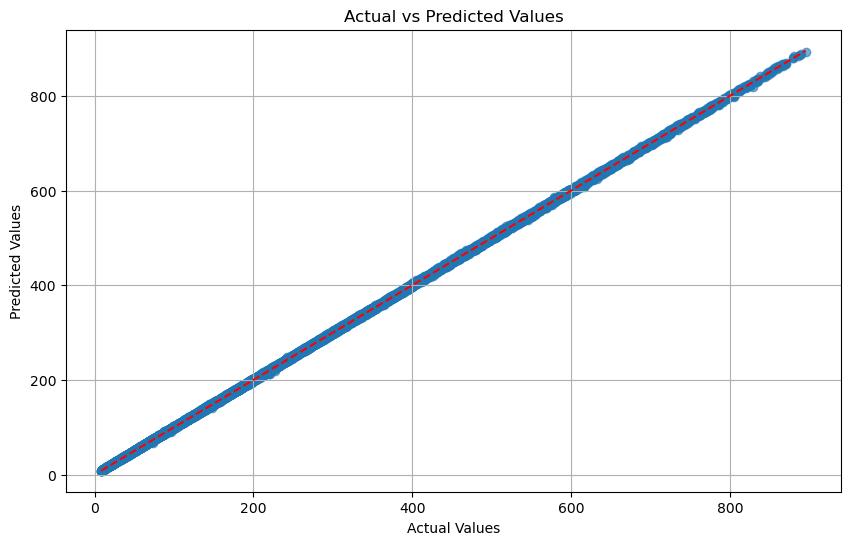

In [181]:
# Predictions and actual values
# Generate predictions using the validation set
y_pred = lgb_model.predict(X_valid)

#Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')  # 대각선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()


- **Plot Explanation - Prediction result** : 
    - The graphs of real and predicted values show a linear relationship in which the two values are almost identical. This suggests that the model is predicting the real data well.

<br>

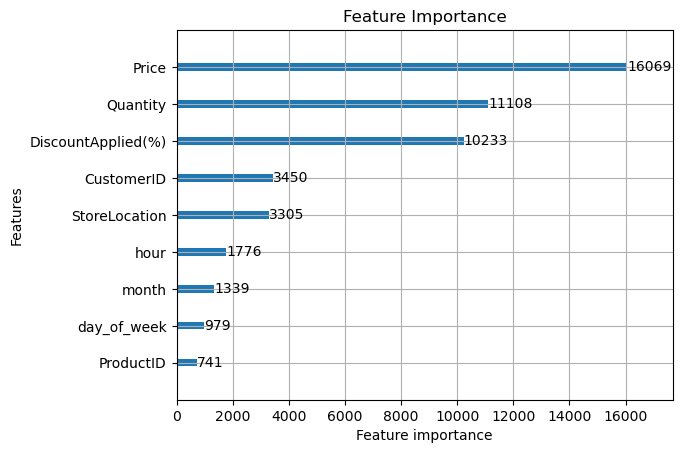

In [158]:
# Plot feature importance for the LightGBM model
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()


- **Plot Explanation - Feature importance** : 
    - The most important characteristics of the improved model are still 'Price', 'Quantity', and 'DiscountApplied(%), and the impact of these characteristics on prediction enables business strategy to be established.
    - CustomerID, Store Location, and hour are also important attributes, with further analysis of customer behavior and sales patterns to gain insight.

#### Conclusion : Retail Transaction Prediction with LightGBM
- The model predicted retail transaction total accuracy in a good direction, as shown by a decrease in RMSE from 1.59576 to 1.26342 after hyperparameter tuning. These improvements represent better generalization and prediction error reduction for unseen data.
- Key implications:
    - Feature engineering and selection improved model performance.
    - In hyperparameter tuning, we improved model accuracy, especially by increasing `num_leaves` and adjusting `learning_rate`.
    - Early stopping was useful in preventing overfitting during training.
- Applications on retail businesses  area:
    - Sales Forecast: Based on historical transaction data, you will be able to predict total sales to help manage inventory.
    - Analyzing customer behavior: Use transaction data to identify when customers are most active (in hours/days/months) and customize operations accordingly.

<br>

- #### References
    - Data : https://www.kaggle.com/datasets/fahadrehman07/retail-transaction-dataset 
    - Ke, G., Meng, Q., Finley, T., Wang, T., Chen, W., Ma, W., ... & Liu, T. Y. (2017). Lightgbm: A highly efficient gradient boosting decision tree. Advances in neural information processing systems, 30.
    - Rane, R., Mavale, S., & Katade, J. (2021). A Novel Prediction Model for Diabetes Detection Using Gridsearch and A Voting Classifier between Lightgbm and KNN. 2021 2nd Global Conference for Advancement in Technology (GCAT).